In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Long Solution</span> </span>  </span></p>
</div>

In [39]:
image2 = cv2.imread('media-ex13/Chambord-1.jpg')
image1 = cv2.imread('media-ex13/Chambord-2.jpg')
image3 = cv2.imread('media-ex13/Chambord-3.jpg')

In [40]:
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

In [41]:
sift = cv2.SIFT_create()
keypoints1, descriptor1 = sift.detectAndCompute(img1_gray, None)
keypoints2, descriptor2 = sift.detectAndCompute(img2_gray, None)
keypoints3, descriptor3 = sift.detectAndCompute(img3_gray, None)

In [42]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptor1, descriptor2, k=2)

In [43]:
good = []
for m, n  in matches:
    if m.distance < 0.5*n.distance:
        good.append(m)

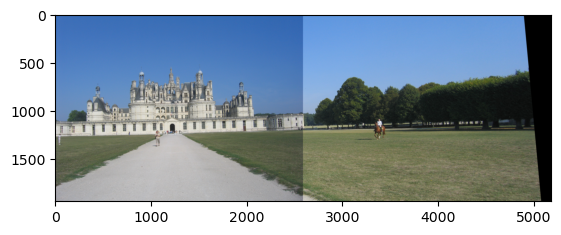

In [44]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good] ).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good] ).reshape(-1, 1, 2)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    dst = cv2.warpPerspective(image1, M, (image2.shape[1] + image1.shape[1], image2.shape[0]))
    dst[0:image2.shape[0], 0:image2.shape[1]] = image2

    plt.imshow(dst[...,::-1])

In [45]:
image31 = cv2.flip(image3, 1); image21 = cv2.flip(image2,1)
img21_gray = cv2.cvtColor(image21, cv2.COLOR_BGR2GRAY)
img31_gray = cv2.cvtColor(image31, cv2.COLOR_BGR2GRAY)
keypoints3, descriptor3 = sift.detectAndCompute(img31_gray, None)
keypoints2, descriptor2 = sift.detectAndCompute(img21_gray, None)

matcher2 = cv2.BFMatcher()
matches2 = matcher2.knnMatch(descriptor3, descriptor2, k=2)

In [46]:
good2 = []
for m, n  in matches2:
    if m.distance < 0.5*n.distance:
        good2.append(m)

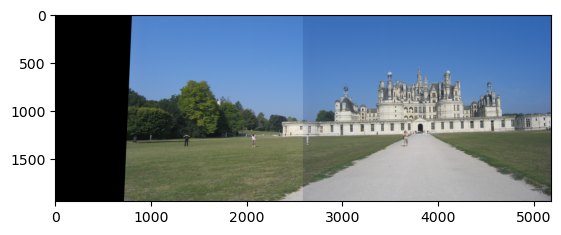

In [47]:
MIN_MATCH_COUNT = 10
if len(good2) > MIN_MATCH_COUNT:
    src_pts2 = np.float32([keypoints3[m.queryIdx].pt for m in good2] ).reshape(-1, 1, 2)
    dst_pts2 = np.float32([keypoints2[m.trainIdx].pt for m in good2] ).reshape(-1, 1, 2)
    
    M2, mask2 = cv2.findHomography(src_pts2, dst_pts2, cv2.RANSAC, 5.0)

    output_size = (image2.shape[1] + image3.shape[1], image2.shape[0])
    dst2 = cv2.warpPerspective(image31, M2, output_size)
    
    dst2[0:image3.shape[0], 0:image3.shape[1]] = image21
    
    dst2 = cv2.flip(dst2, 1)

    plt.imshow(dst2[...,::-1])

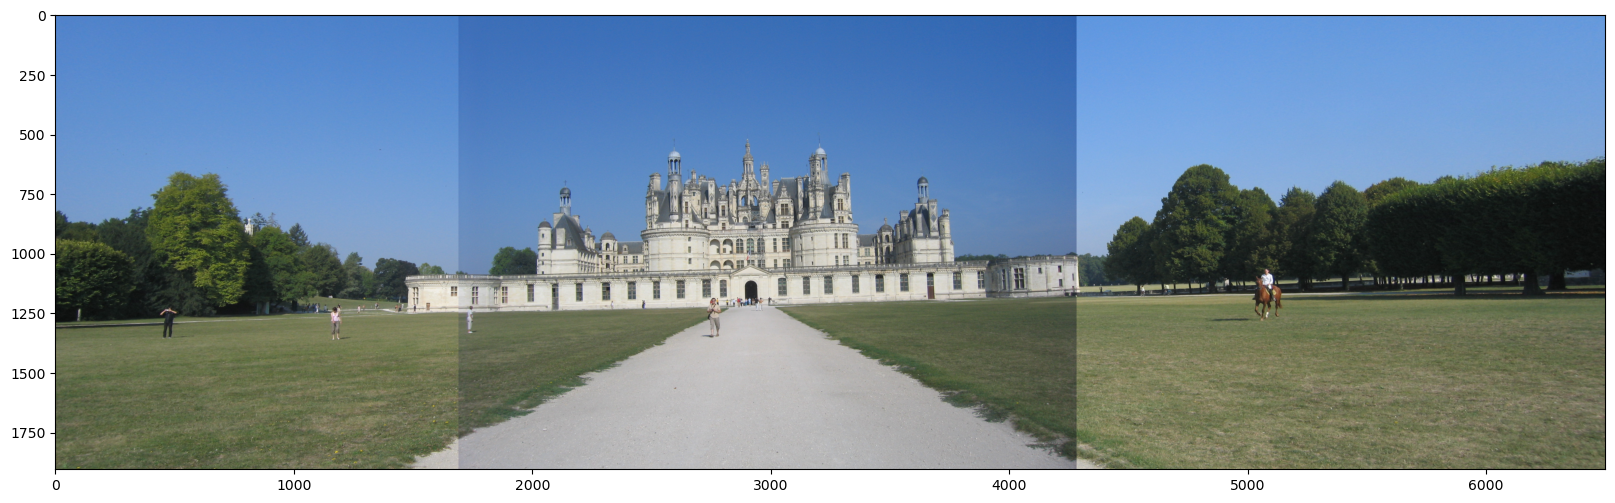

In [48]:
final_image = np.hstack((dst2,dst[:,image2.shape[1]::]))
final_image = final_image[20:-20,900:7400]

plt.figure(figsize=[20,20])
plt.imshow(final_image[...,::-1])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Short Solution</span> </span>  </span></p>
</div>

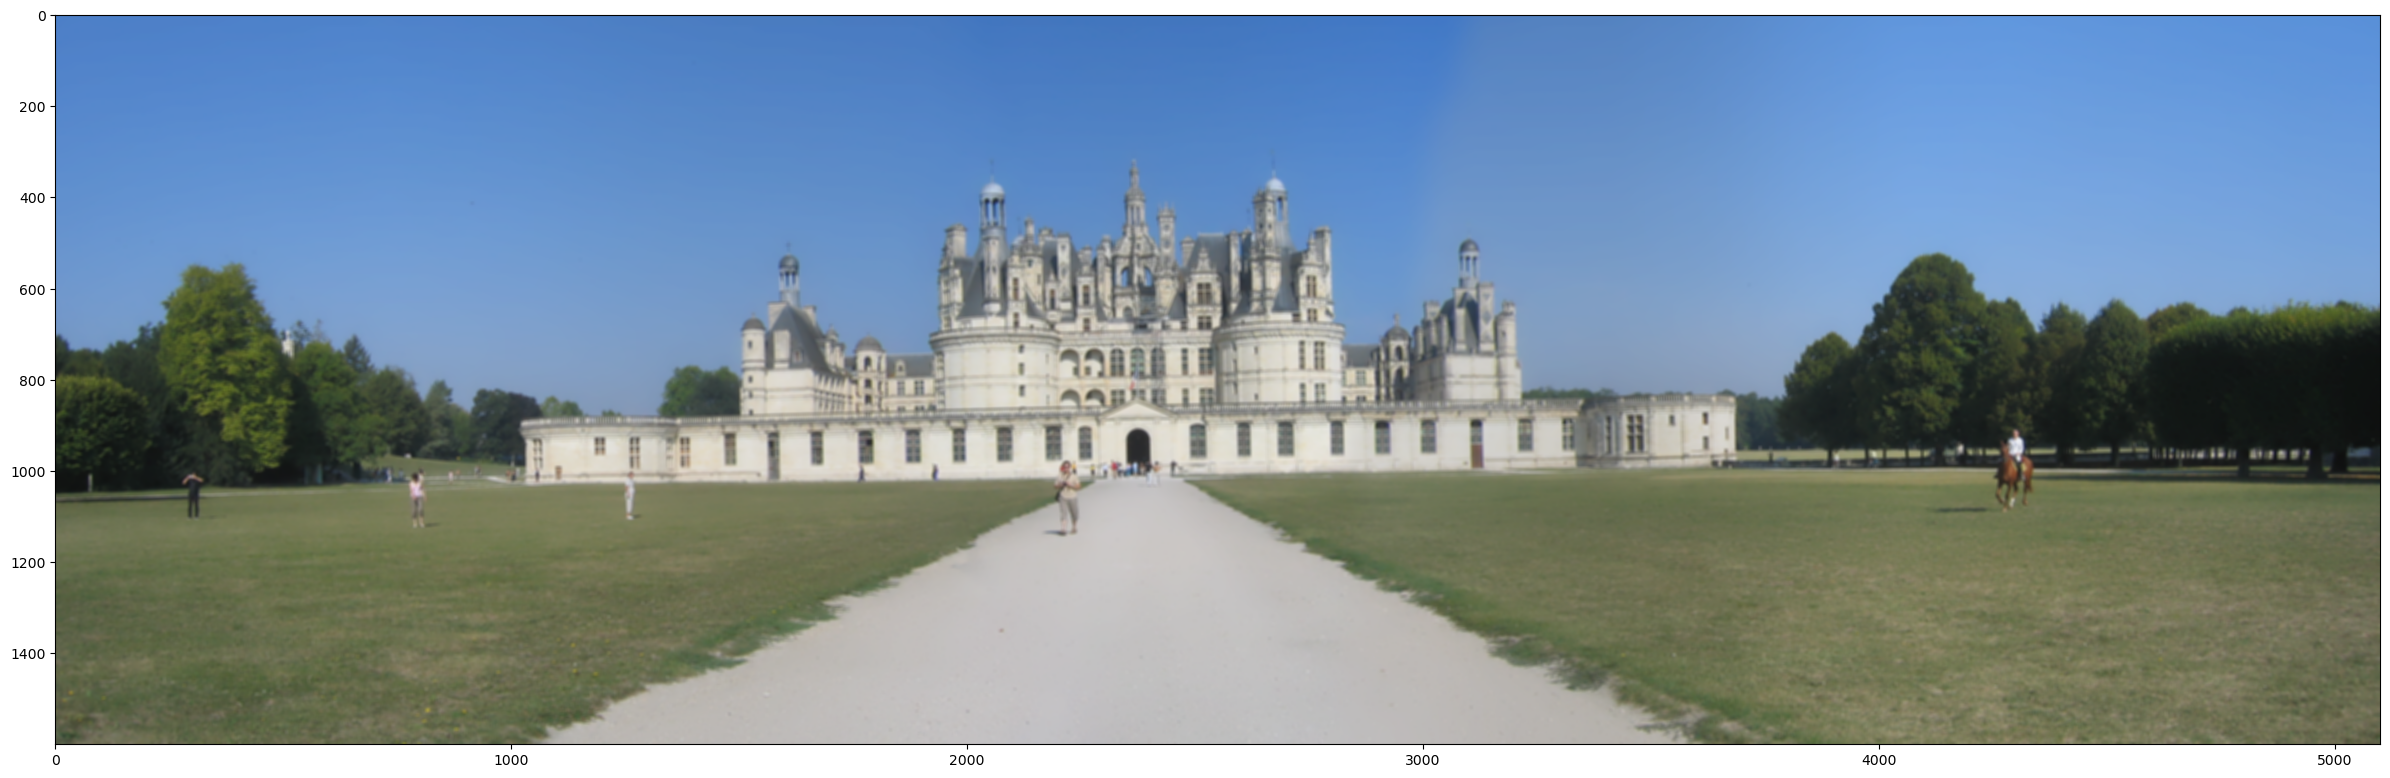

In [49]:
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch([image3,image2,image1])
if status == 0:
    plt.figure(figsize=[30,10]) 
    plt.imshow(result[...,::-1])
    
result = result[200:1800,100:5200]
result = cv2.GaussianBlur(result,(9,9), 5)

plt.imshow(result[...,::-1])